# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#
url = 'http://api.openweathermap.org/data/2.5/weather?unit=imperial&appid='

api_key = api_keys.api_key

url_key = url + api_key + '&q='
url_key


'http://api.openweathermap.org/data/2.5/weather?unit=imperial&appid=2f8a72e4648242eb7d997ebe72db2fe5&q='

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
test_data = ['austin', 'denver', 'los angeles', 'houston', 'dallas']
count = 1

city_name = []
cloudiness = []
country = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#for city in test_data:
for city in cities:
    try:
        print(f'Processing Record {count} | {city}')
        response = requests.get(url_key + city).json()
        city_name.append(response['name'])
        
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        count += 1
        
    except:
        print(f'City not found. Skipping {city}')
    
city_dict = {'City Name': city_name, 
             'Cloudiness': cloudiness, 
             'Country': country, 
             'Humidity': humidity, 
             'Latitude': lat, 
             'Longitude': lng,
             'Max Temp': max_temp,
             'Wind Speed': wind_speed
            }

city_db = pd.DataFrame(city_dict)


Processing Record 1 | ponta do sol
Processing Record 2 | pisco
Processing Record 3 | avarua
Processing Record 4 | new norfolk
Processing Record 5 | bambous virieux
Processing Record 6 | ushuaia
Processing Record 7 | talnakh
Processing Record 8 | victoria
Processing Record 9 | barrow
Processing Record 10 | lebu
Processing Record 11 | rikitea
Processing Record 12 | hualmay
Processing Record 13 | illoqqortoormiut
City not found. Skipping illoqqortoormiut
Processing Record 13 | hermanus
Processing Record 14 | san ramon de la nueva oran
Processing Record 15 | sao bernardo
Processing Record 16 | sandviken
Processing Record 17 | touros
Processing Record 18 | quatre cocos
Processing Record 19 | grand gaube
Processing Record 20 | khatanga
Processing Record 21 | fare
Processing Record 22 | geraldton
Processing Record 23 | surt
Processing Record 24 | vaitupu
City not found. Skipping vaitupu
Processing Record 24 | kaohsiung
Processing Record 25 | castro
Processing Record 26 | fortuna
Processing Re

Processing Record 201 | caraballeda
Processing Record 202 | mar del plata
Processing Record 203 | novoagansk
Processing Record 204 | chumikan
Processing Record 205 | andenes
City not found. Skipping andenes
Processing Record 205 | isangel
Processing Record 206 | college
Processing Record 207 | padang
Processing Record 208 | manisa
Processing Record 209 | belfast
Processing Record 210 | arman
Processing Record 211 | perevoz
Processing Record 212 | severo-yeniseyskiy
Processing Record 213 | tibagi
Processing Record 214 | ahipara
Processing Record 215 | jardim
Processing Record 216 | aden
Processing Record 217 | vernon
Processing Record 218 | bulgan
Processing Record 219 | banda aceh
Processing Record 220 | kiunga
Processing Record 221 | kaeo
Processing Record 222 | taoudenni
Processing Record 223 | illapel
Processing Record 224 | ancud
Processing Record 225 | tessalit
Processing Record 226 | gympie
Processing Record 227 | shaunavon
Processing Record 228 | berlevag
Processing Record 229 |

Processing Record 406 | masallatah
Processing Record 407 | makokou
Processing Record 408 | jammu
Processing Record 409 | massakory
Processing Record 410 | pimentel
Processing Record 411 | zenzeli
Processing Record 412 | coquimbo
Processing Record 413 | axim
Processing Record 414 | hirara
Processing Record 415 | kostomuksha
Processing Record 416 | qasigiannguit
Processing Record 417 | khash
Processing Record 418 | topeka
Processing Record 419 | verkhnyaya inta
Processing Record 420 | ponazyrevo
Processing Record 421 | namatanai
Processing Record 422 | iqaluit
Processing Record 423 | mayumba
Processing Record 424 | jacareacanga
Processing Record 425 | kirovskiy
Processing Record 426 | camana
City not found. Skipping camana
Processing Record 426 | gurgan
City not found. Skipping gurgan
Processing Record 426 | tateyama
Processing Record 427 | acajutla
Processing Record 428 | amapa
Processing Record 429 | turukhansk
Processing Record 430 | melur
Processing Record 431 | surgut
Processing Rec

In [28]:
city_db.head()

,City Name,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ponta do Sol,28,BR,62,-20.63,-46.00,292.257,3.27
1,Pisco,90,PE,82,-13.71,-76.20,291.150,2.10
2,Avarua,92,CK,73,-21.21,-159.78,297.150,2.60
3,New Norfolk,75,AU,58,-42.78,147.06,288.710,5.10
4,Bambous Virieux,75,MU,88,-20.34,57.76,295.150,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

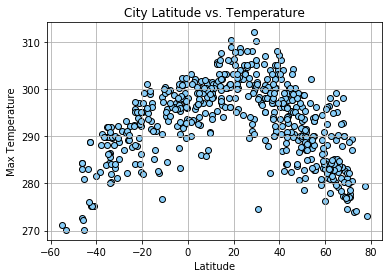

In [29]:
plt.scatter(city_db['Latitude'], city_db['Max Temp'], marker="o", facecolor='lightskyblue', edgecolor="black")
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig('./Images/Latitude_vs_Temp.png')
plt.grid()

#### Latitude vs. Humidity Plot

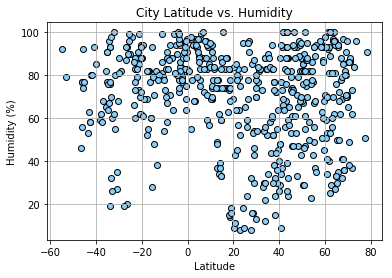

In [30]:
plt.scatter(city_db['Latitude'], city_db['Humidity'], marker="o", facecolor='lightskyblue', edgecolor="black")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('./Images/Latitude_vs_Humidity.png')
plt.grid()

#### Latitude vs. Cloudiness Plot

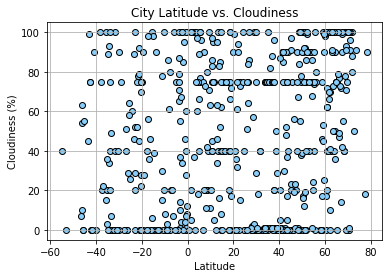

In [31]:
plt.scatter(city_db['Latitude'],city_db['Cloudiness'], marker="o", facecolor='lightskyblue', edgecolor="black")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('./Images/Latitude_vs_Cloudiness.png')
plt.grid()

#### Latitude vs. Wind Speed Plot

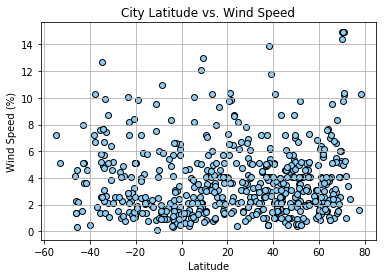

In [32]:
plt.scatter(city_db['Latitude'], city_db['Wind Speed'], marker="o", facecolor='lightskyblue', edgecolor="black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.savefig('./Images/Latitude_vs_Windspeed.png')
plt.grid()

In [34]:
city_db.to_csv('city_df.csv')